# Limits of Diversification part 1 + 2

+ (incl the anatomy of a cap-weighted porfolio, and a bunch of cool pandas stuff along the way) 

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_ins as eri
import pandas as pd
import numpy as np

ins_return = eri.get_ins_returns()
ins_size = eri.get_ins_size()
ins_nfirms = eri.get_ins_nfirms()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
ins_return.shape

(1122, 30)

In [16]:
ins_size.shape

(1122, 30)

In [17]:
ins_nfirms.shape

(1122, 30)

In [18]:
ins_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [19]:
ins_mktcap = ins_nfirms * ins_size # market capitalisation for each industry at each month
ins_mktcap.shape

(1122, 30)

In [20]:
total_mktcap = ins_mktcap.sum(axis="columns") #每列加总，避免相同行业相加

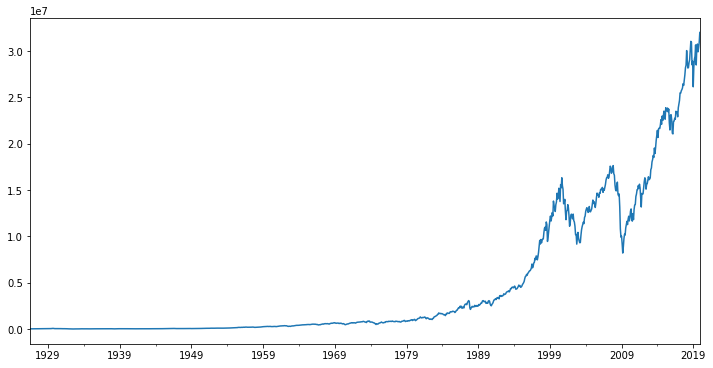

In [22]:
total_mktcap.plot(figsize=(12,6))

+ As we can see from above table, when the crises happened, the total market capitalisation lost a lot: 2003,2007

In [25]:
## we want to get the mktcap weights for each industry 
ins_capweight = ins_mktcap.divide(total_mktcap, axis="rows") 
## achieved by the DIVIDE function where you give the denominator
## and the axis = row means that you want it divided across rows

In [26]:
ins_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [27]:
ins_capweight["1926"].sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

+ Again, the axis means you sum up the numbers across columnms

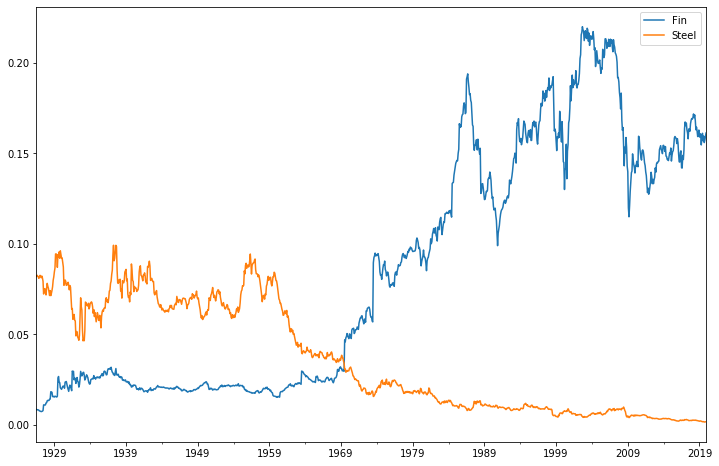

In [31]:
ins_capweight[["Fin","Steel"]].plot(figsize=(12,8))

In [32]:
total_market_return = (ins_capweight * ins_return).sum(axis="columns")

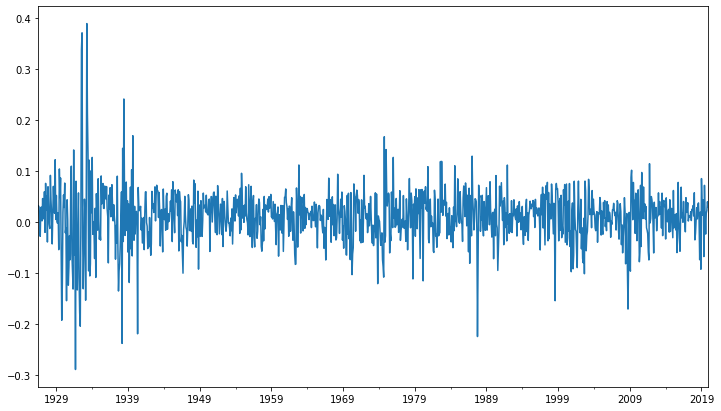

In [43]:
total_market_return.plot(figsize=(12,7))

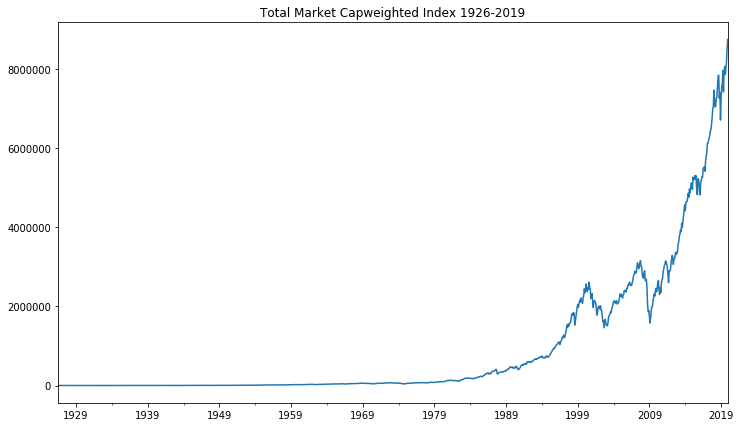

In [44]:
total_market_index = eri.drawdown(total_market_return).wealth
total_market_index.plot(figsize=(12,7), title="Total Market Capweighted Index 1926-2019")

+ What we want to do next is to look at the returns of market at a 3 year period
+ Look at how return is related to market crrelations

In [45]:
# First you need to get a 36-month returns

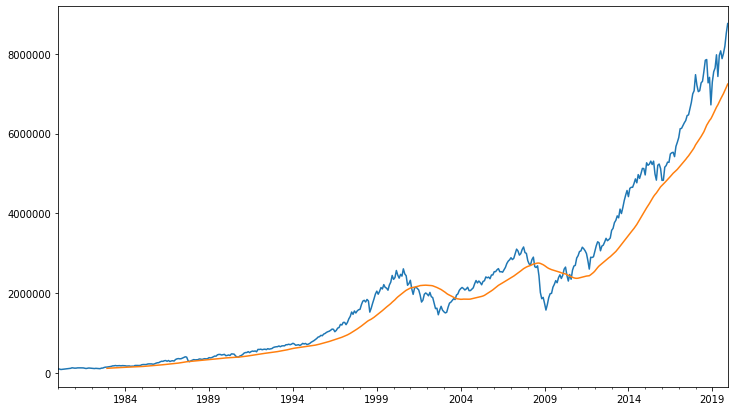

In [48]:
total_market_index["1980":].plot(figsize=(12,7))
total_market_index["1980":].rolling(window=36).mean().plot(figsize=(12,7))

+ rolling function always stats with a time series (in this case, total market index) 
+ rolling function will produce a new time series of which each element is computed out of the window size(in this case,36 months) 
+ what we can do in that 36 months window ? simpliest, the mean return of that time series
+ ploting the index and a moving average of 36 trailing months
+ matplotlib is so intelligent that it is able to distinguish your commands in the same cell and and plot the 2 lines in one cell

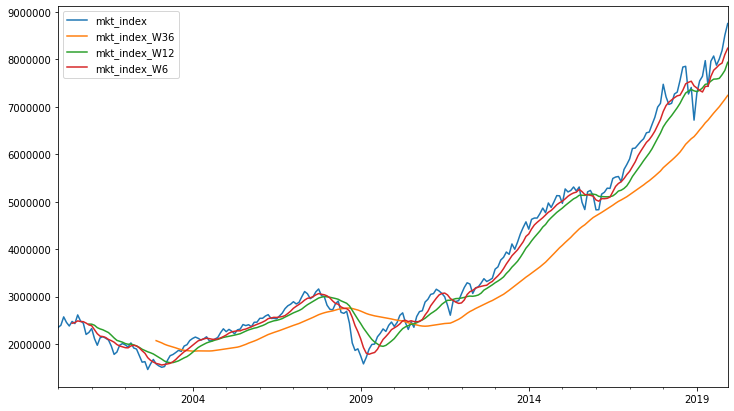

In [80]:
total_market_index["2000":].plot(label="mkt_index",figsize=(12,7),legend=True)
total_market_index["2000":].rolling(window=36).mean().plot(label="mkt_index_W36",figsize=(12,7),legend=True)
total_market_index["2000":].rolling(window=12).mean().plot(label="mkt_index_W12",figsize=(12,7),legend=True)
total_market_index["2000":].rolling(window=6).mean().plot(label="mkt_index_W6",figsize=(12,7),legend=True)

In [55]:
# now we want to look at the real return of the index not the index itself

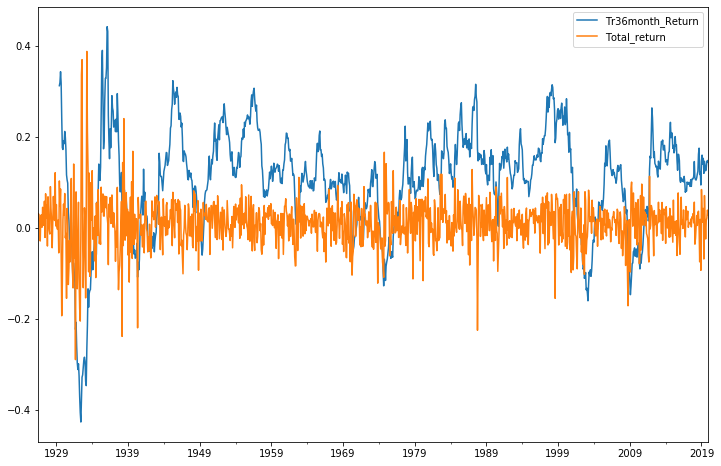

In [76]:
tmi_tr36m_rets = total_market_return.rolling(window=36).aggregate(eri.annualize_rets,periods_per_year = 12)
tmi_tr36m_rets.plot(figsize=(12,8), label="Tr36month_Return", legend=True) # compounding return
total_market_return.plot(figsize=(12,8),label="Total_return", legend=True) # actual returns

### Rolling Correlation - along with Mulriindex and .groupby

In [81]:
ts_corr = ins_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2019-12 Whlsl  0.622261  0.523214  0.428816  0.666870  0.804279  0.613065   
        Rtail  0.663921  0.493431  0.214911  0.738218  0.654042  0.462148   
        Meals  0.588447  0.585536  0.245800  0.364088  0.456403  0.551116   
        Fin    0.585779  0.412053  0.385291  0.649571  0.790210  0.469155   
        Other  0.578771  0.574063  0.345347  0.552314  0.578495  0.548357   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2019-12 Whlsl  0.798004  0.726269  0.772389  0.648981  ...  0.681960   
        Rtail  0.718559  0.673552  0.671044  0.587083  ...  0.623098   
        Meals  0.341752  0.427161  0.459228  0.308990  ...  0.385960   
        Fin    0.766948  0.716223  0.795834  0.579773  ...  0.572780   
        Other  0.657415  0.774745  0.738772  0.556590  ...  0.646281   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2019-12 Whlsl  0.720914  0.658294  0.759620  0.856925  1.000000  0.778480   
        Rtail  0.796867  0.663453  0.694217  0.718220  0.778480  1.000000   
        Meals  0.568358  0.458220  0.626278  0.622259  0.545554  0.612092   
        Fin    0.756745  0.651542  0.749086  0.837809  0.866017  0.729781   
        Other  0.695657  0.666240  0.764938  0.788112  0.802925  0.742679   

                  Meals       Fin     Other  
2019-12 Whlsl  0.545554  0.866017  0.802925  
        Rtail  0.612092  0.729781  0.742679  
        Meals  1.000000  0.478046  0.510901  
        Fin    0.478046  1.000000  0.840431  
        Other  0.510901  0.840431  1.000000  

[5 rows x 30 columns]

+ Multi-Index above, as we can see that the first index is the datetime and the second index is the industries

+ now we want to compute the average correlation of the matrix

In [83]:
ts_corr.index.names = ['Date','Industry'] #Givethe names to the first two index
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
Date    Industry                                                               
2019-12 Whlsl     0.622261  0.523214  0.428816  0.666870  0.804279  0.613065   
        Rtail     0.663921  0.493431  0.214911  0.738218  0.654042  0.462148   
        Meals     0.588447  0.585536  0.245800  0.364088  0.456403  0.551116   
        Fin       0.585779  0.412053  0.385291  0.649571  0.790210  0.469155   
        Other     0.578771  0.574063  0.345347  0.552314  0.578495  0.548357   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
Date    Industry                                          ...             
2019-12 Whlsl     0.798004  0.726269  0.772389  0.648981  ...  0.681960   
        Rtail     0.718559  0.673552  0.671044  0.587083  ...  0.623098   
        Meals     0.341752  0.427161  0.459228  0.308990  ...  0.385960   
        Fin       0.766948  0.716223  0.795834  0.579773  ...  0.572780   
        Other     0.657415  0.774745  0.738772  0.556590  ...  0.646281   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Date    Industry                                                               
2019-12 Whlsl     0.720914  0.658294  0.759620  0.856925  1.000000  0.778480   
        Rtail     0.796867  0.663453  0.694217  0.718220  0.778480  1.000000   
        Meals     0.568358  0.458220  0.626278  0.622259  0.545554  0.612092   
        Fin       0.756745  0.651542  0.749086  0.837809  0.866017  0.729781   
        Other     0.695657  0.666240  0.764938  0.788112  0.802925  0.742679   

                     Meals       Fin     Other  
Date    Industry                                
2019-12 Whlsl     0.545554  0.866017  0.802925  
        Rtail     0.612092  0.729781  0.742679  
        Meals     1.000000  0.478046  0.510901  
        Fin       0.478046  1.000000  0.840431  
        Other     0.510901  0.840431  1.000000  

[5 rows x 30 columns]

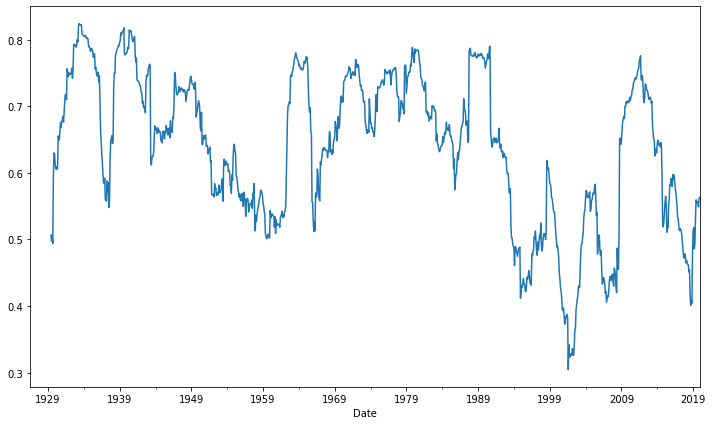

In [95]:
ind_tr36corr = ts_corr.groupby(level='Date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr.plot(figsize = (12,7))

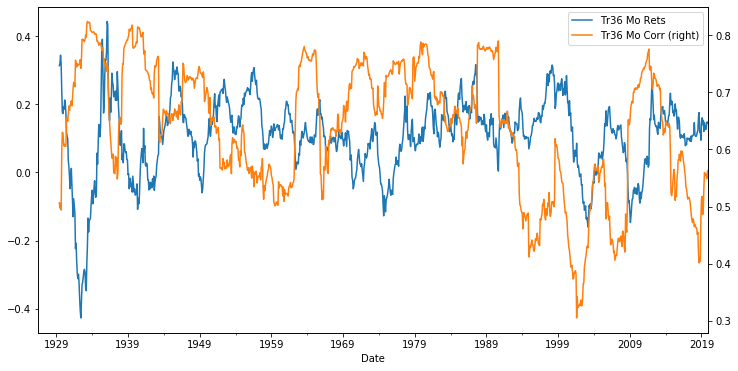

In [96]:
tmi_tr36m_rets.plot(label="Tr36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr.plot(label="Tr36 Mo Corr", figsize=(12,6), legend=True, secondary_y=True) #gice it the second axis with different measure

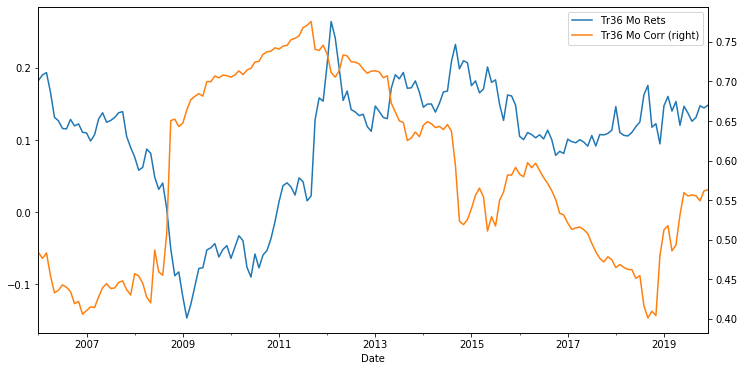

In [97]:
tmi_tr36m_rets["2006":].plot(label="Tr36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr["2006":].plot(label="Tr36 Mo Corr", figsize=(12,6), legend=True, secondary_y=True)

In [98]:
tmi_tr36m_rets.corr(ind_tr36corr) # the correlation between average correlations of industries and the returns of industry

-0.28187382615879764

+ the diversification will not help you at the bear market situation
+ at the bear market situation, returns of industry fall while the correlation among different industries rise (since the corr is negative), means that all the industries are more correlated and you cannot to stop losing money in your portfolio